# Homework 5

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Questions 2-5

In [85]:
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1]) * 1.0

In [4]:
def phi_1(x):
    return x[1]*x[1]-2*x[0]+3

def phi_2(x):
    return x[0]*x[0]-2*x[1]-3

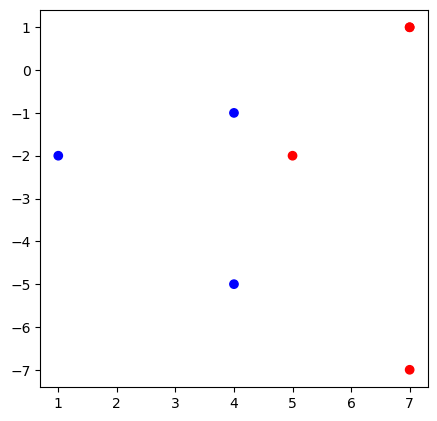

In [5]:
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(5, 5));
ax.scatter(np.apply_along_axis(phi_1, 1, X), np.apply_along_axis(phi_2, 1, X), c=y, cmap='bwr');
plt.show()

In [69]:
from cvxopt import matrix, solvers

In [70]:
def K(x, xx):
    # Kernel function
    return (1+x.T@xx) ** 2

def phi(x):
    # Transformation corresponding to the Kernel function above
    x1, x2 = x
    return np.array([1, np.sqrt(2)*x1, np.sqrt(2)*x2, x1**2, x1*x2, x2**2, x2*x1])

In [71]:
P = np.zeros((7, 7))
for i in range(7):
    for j in range(7):
        P[i, j] = y[i] * y[j] * K(X[i], X[j])
#         P[i, j] = y[i] * y[j] * phi(X[i]).T@phi(X[j])
P = matrix(P)

q = matrix(np.ones(7) * -1.0, (7, 1))
G = matrix(np.eye(7) * -1.0, (7, 7))
h = matrix(np.zeros(7) * 1.0, (7, 1))
A = matrix(y, (1, 7))
b = matrix(0.0)

**<p style="color: red;">The cvxopt wrapper was slightly modified to work MOSEK version 9.</p>**

In [72]:
sol = solvers.qp(P, q, G, h, A, b, solver='mosek');

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : QO (quadratic optimization problem)
  Constraints            : 8               
  Cones                  : 0               
  Scalar variables       : 7               
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Quadratic to conic reformulation started.
Quadratic to conic reformulation terminated. Time: 0.00    
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :        

In [73]:
alpha = np.array(sol['x']).reshape(7,)
print(sum(alpha))

2.814814814952377


In [74]:
alpha

array([ 6.96906703e-11,  7.03703704e-01,  7.03703704e-01,  8.88888889e-01,
        2.59259259e-01,  2.59259259e-01, -2.95686513e-11])

In [75]:
b = 0
w = np.zeros(7,)
sv_ind = -1
for i, a in enumerate(alpha):
    if a < 1e-10:
        continue  # Non-SV
    if sv_ind == -1:
        sv_ind = i
    b += a * y[i] * K(X[i], X[sv_ind])
    w += a * y[i] * phi(X[i])
b = y[sv_ind] - b

In [76]:
print(w, b)

[ 9.92582683e-11 -1.25707872e+00  2.22044605e-16  8.88888889e-01
  0.00000000e+00  6.66666667e-01  0.00000000e+00] -1.6666666668846273


In [79]:
np.sqrt(2)*w[1]*9

-16.000000001240213

## Questions 15-20

In [6]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [15]:
def load_data(file):
    arr = pd.read_csv(file, header=None, sep='\s+').to_numpy()
    X, y = arr[:,1:], arr[:,0]

    return X, y

In [8]:
X, y = load_data('features.train')

y[y != 0] = -1.0
y[y == 0] = 1.0

clf = SVC(C=0.01, kernel='linear')
clf.fit(X, y);

In [9]:
w = np.zeros(2,)
for i, v in enumerate(clf.support_vectors_):
    w += abs(clf.dual_coef_[0, i]) * y[clf.support_[i]] * v
np.sqrt(w.T@w)

0.5713171494256867

In [10]:
X, y_orig = load_data('features.train')
for pred_class in range(0, 9, 2):
    y = y_orig.copy()
    y[y != pred_class] = -1.0
    y[y == pred_class] = 1.0
    
    clf = SVC(C=0.01, kernel='poly', degree=2, gamma=1, coef0=1)
    clf.fit(X, y)
    
    print(f'Class: {pred_class}', end='  ')
    print(np.average(clf.predict(X) != y), end='  ')
    print(np.sum(np.abs(clf.dual_coef_)))

Class: 0  0.10588396653408312  21.78
Class: 2  0.10026059525442327  14.620000000000001
Class: 4  0.08942531888629818  13.04
Class: 6  0.09107118365107666  13.28
Class: 8  0.07433822520916199  10.84


In [237]:
clf.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'poly',
 'degree': 2,
 'gamma': 1,
 'coef0': 1,
 'tol': 0.001,
 'C': 0.01,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None,
 '_sparse': False,
 'class_weight_': array([1., 1.]),
 'classes_': array([-1.,  1.]),
 '_gamma': 1,
 'support_': array([   8,   40,   45, ..., 7237, 7251, 7256], dtype=int32),
 'support_vectors_': array([[ 0.28954102, -4.644125  ],
        [ 0.32469141, -4.671125  ],
        [ 0.24815234, -3.5175    ],
        ...,
        [ 0.24613477, -3.1555    ],
        [ 0.14553125, -1.92825   ],
        [ 0.25189063, -3.2545    ]]),
 '_n_support': array([1234,  542], dtype=int32),
 'dual_coef_': array([[-0.00318737, -0.00032   , -0.00319313, ...,  0.01      ,
          0.01      ,  0.01      ]]),
 'intercept_': array([-1.00203226]),
 'probA_': array([], dtype=float64),
 'probB_': arra

In [16]:
def K_rbf(x, xx):
    v = x - xx
    return np.exp(-100 * (v.T @ v))

In [19]:
X, y = load_data('features.train')
X_test, y_test = load_data('features.test')

y[y != 0] = -1.0
y[y == 0] = 1.0

y_test[y_test != 0] = -1.0
y_test[y_test == 0] = 1.0

for C in [0.001, 0.01, 0.1, 1, 10]:
    clf = SVC(C=C, kernel='rbf', gamma=100)
    clf.fit(X, y)
    
    print(f'C = {C}', end='\t')
    
    # Norm of w in Z space
    w_norm = 0
    for am, vm in zip(clf.dual_coef_[0], clf.support_vectors_):
        for an, vn in zip(clf.dual_coef_[0], clf.support_vectors_):
            w_norm += am * an * K_rbf(vm, vn)        
    print('|w|', w_norm, end='\t')
    
    # Xi
    xi = 0
    for a, v in zip(clf.dual_coef_[0], clf.support_vectors_):
        if np.abs(a) < C:
            continue  # Free SV
        
        tmp = 0
        for an, vn in zip(clf.dual_coef_[0], clf.support_vectors_):
            tmp += an * K_rbf(vn, v)
        xi += 1-np.sign(a)*(tmp+clf.intercept_[0])
    print('xi', xi, end='\t')
    
    # Number of support vectors
    print('|SV|', len(clf.support_), end='\t')
    
    # Eout
    print(np.average(clf.predict(X_test) != y_test))

C = 0.001	|w| 0.014739520948422024	xi 2373.260339835891	|SV| 2398	0.17887394120577976
C = 0.01	|w| 1.46992031654178	xi 2241.0092380995543	|SV| 2520	0.17887394120577976
C = 0.1	|w| 60.23698960642895	xi 1480.8011772435125	|SV| 2285	0.10513203786746388
C = 1	|w| 141.183308807142	xi 1330.6625552916203	|SV| 1783	0.10363726955655207
C = 10	|w| 592.2144959476586	xi 1273.1157136891864	|SV| 1675	0.10463378176382661


In [17]:
X, y = load_data('features.train')
X_test, y_test = load_data('features.test')

# y[y != 0] = -1.0
# y[y == 0] = 1.0

# y_test[y_test != 0] = -1.0
# y_test[y_test == 0] = 1.0

y = y == 0
y_test = y_test == 0

for g in [1.0, 10.0, 100.0, 1000.0, 10000.0]:
#     clf = SVC(C=0.1, kernel='rbf', gamma=g)
    clf = SVC(kernel='rbf', gamma=g, C=0.1)
    clf.fit(X, y)
    
    print(f'gamma = {g}', end='\t')
    print(np.sum(clf.predict(X_test) != y_test))

gamma = 1.0	215
gamma = 10.0	199
gamma = 100.0	211
gamma = 1000.0	359
gamma = 10000.0	359


In [18]:
X, y = load_data('features.train')
X_test, y_test = load_data('features.test')

y[y != 0] = -1.0
y[y == 0] = 1.0

y_test[y_test != 0] = -1.0
y_test[y_test == 0] = 1.0

inds = np.arange(len(X))
cnts = {}

for rep in range(100):
    min_Eval = float('inf')
    chosen_g = -1
    for g in [1, 10, 100, 1000, 10000]:
        np.random.shuffle(inds)

        X_val, y_val = X[inds[:1000]], y[inds[:1000]]
        X_train, y_train = X[inds[1000:]], y[inds[1000:]]

        clf = SVC(C=0.1, kernel='rbf', gamma=g)
        clf.fit(X_train, y_train)
        Eval = np.sum(clf.predict(X_val) != y_val)
        if Eval < min_Eval:
            min_Eval = Eval
            chosen_g = g

    if chosen_g not in cnts:
        cnts[chosen_g] = 0
    cnts[chosen_g] += 1

print(cnts)

{10: 39, 100: 38, 1: 23}
